# << 피마 인디언 당뇨병 예측 >>
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'D:/Kamie/dataset/diabetes.csv'

In [3]:
df = pd.read_csv(path)
# df.columns = ["임신", "공복 혈당", "혈압", "피부 두께", "인슐린", "BMI", "당뇨력", "나이", "class"],
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[["Pregnancies", "Outcome"]]

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [7]:
df.value_counts("Pregnancies").sort_values()

Pregnancies
17      1
15      1
14      2
12      9
13     10
11     11
10     24
9      28
8      38
7      45
6      50
5      57
4      68
3      75
2     103
0     111
1     135
dtype: int64

In [8]:
df.value_counts("Pregnancies").sort_index()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64

In [9]:
df_diabetes = df.loc[df["Outcome"]==1]
df_normal = df.loc[df["Outcome"]==0]

In [10]:
hist1 = df_diabetes.value_counts("Pregnancies").sort_index()
hist1

Pregnancies
0     38
1     29
2     19
3     27
4     23
5     21
6     16
7     25
8     22
9     18
10    10
11     7
12     4
13     5
14     2
15     1
17     1
dtype: int64

In [11]:
hist2 = df_normal.value_counts("Pregnancies").sort_index()
hist2

Pregnancies
0      73
1     106
2      84
3      48
4      45
5      36
6      34
7      20
8      16
9      10
10     14
11      4
12      5
13      5
dtype: int64

## 당뇨 확률 = 당뇨 걸린 사람 수 / 임신 n회한 사람 수

In [12]:
hist3 = hist1 / (hist1 + hist2)
hist3  # NaN : 당뇨 걸린 사람 밖에 없어서 이런 값 나오는거야

Pregnancies
0     0.342342
1     0.214815
2     0.184466
3     0.360000
4     0.338235
5     0.368421
6     0.320000
7     0.555556
8     0.578947
9     0.642857
10    0.416667
11    0.636364
12    0.444444
13    0.500000
14         NaN
15         NaN
17         NaN
dtype: float64

## 한 줄로 표현하기

In [13]:
df[["Pregnancies","Outcome"]].groupby(["Pregnancies"], as_index=False).mean().sort_values(by="Pregnancies", ascending=True)

,Pregnancies,Outcome
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


# ▶ 시각화 : 히트맵

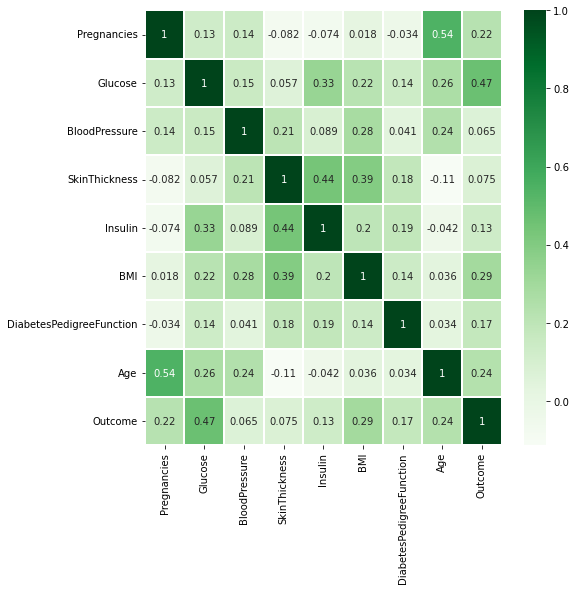

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),
            annot=True,  # annotation
            cmap=plt.cm.Greens,  # https://matplotlib.org/2.0.2/users/colormaps.html 참고
            linewidths=0.1,
            linecolor="white",
           )
plt.show()

## 공복혈당과 당뇨와의 관계 시각화

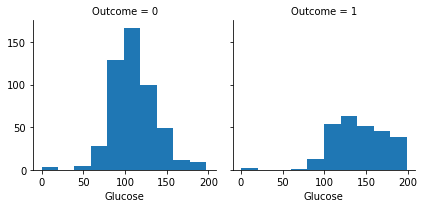

In [15]:
grid = sns.FacetGrid(df, col="Outcome")  # column을 Outcome이 0인거, 1인거 각각 그리겠다, Outcome별로 그래프를 그려라
grid.map(plt.hist, "Glucose", bins=10)
plt.show()

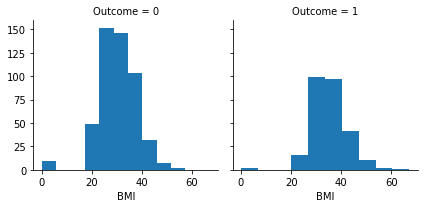

In [16]:
grid = sns.FacetGrid(df, col="Outcome")  # column을 Outcome이 0인거, 1인거 각각 그리겠다, Outcome별로 그래프를 그려라
grid.map(plt.hist, "BMI", bins=10)
plt.show()

# << 신경망 학습 >>
---

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

In [18]:
dataset = np.loadtxt(path, delimiter=",", skiprows=1)
# skiprows=1 : 가장 첫 줄, 컬럼명 날리기
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [19]:
x = dataset[:700, :-1]
y = dataset[:700, -1]

x_test = dataset[700:, :-1]
y_test = dataset[700:, -1]

In [20]:
model = Sequential()

In [21]:
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [23]:
9*12

108

In [24]:
13*8

104

In [25]:
model.compile(loss="binary_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])
model.fit(x, y, epochs=200, batch_size=50, 
          # verbose=0,
         )

Epoch 1/200
14/14 [==============================] - 1s 6ms/step - loss: 18.5904 - accuracy: 0.6557
Epoch 2/200
14/14 [==============================] - 0s 5ms/step - loss: 13.8734 - accuracy: 0.6557
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 9.6987 - accuracy: 0.6571
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 6.0441 - accuracy: 0.6271
Epoch 5/200
14/14 [==============================] - 0s 7ms/step - loss: 4.1056 - accuracy: 0.5714
Epoch 6/200
14/14 [==============================] - 0s 5ms/step - loss: 3.0186 - accuracy: 0.5729
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - loss: 2.0472 - accuracy: 0.5857
Epoch 8/200
14/14 [==============================] - 0s 4ms/step - loss: 1.4064 - accuracy: 0.5914
Epoch 9/200
14/14 [==============================] - 0s 5ms/step - loss: 1.2189 - accuracy: 0.5757
Epoch 10/200
14/14 [==============================] - 0s 6ms/step - loss: 1.1464 - accuracy: 0.5914
Epoch 1

In [26]:
model.predict([[6, 148,	72,	35,	0, 33.6, 0.627,	50]])

array([[0.38992384]], dtype=float32)

In [27]:
model.evaluate(x_test, y_test)  # 

3/3 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.6471


[0.6487730145454407, 0.6470588445663452]

## 데이터 정규화
- min-max normalization : 제일 큰 값은 1, 제일 작은 값은 0으로 만들기
- StandardScaler : 표준

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.fit_transform(x_test)

In [30]:
model.fit(x, y, epochs=200, batch_size=50, 
          # verbose=0,
         )

Epoch 1/200
14/14 [==============================] - 0s 6ms/step - loss: 0.6449 - accuracy: 0.6600
Epoch 2/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6671
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.6771
Epoch 4/200
14/14 [==============================] - 0s 6ms/step - loss: 0.5904 - accuracy: 0.6786
Epoch 5/200
14/14 [==============================] - 0s 6ms/step - loss: 0.5791 - accuracy: 0.6786
Epoch 6/200
14/14 [==============================] - 0s 7ms/step - loss: 0.5687 - accuracy: 0.6843
Epoch 7/200
14/14 [==============================] - 0s 6ms/step - loss: 0.5606 - accuracy: 0.6843
Epoch 8/200
14/14 [==============================] - 0s 5ms/step - loss: 0.5536 - accuracy: 0.6886
Epoch 9/200
14/14 [==============================] - 0s 4ms/step - loss: 0.5477 - accuracy: 0.6829
Epoch 10/200
14/14 [==============================] - 0s 5ms/step - loss: 0.5416 - accuracy: 0.6900
Epoch 11/

In [31]:
model.evaluate(x_test, y_test)  # [loss, accuracy]

3/3 [==============================] - 0s 4ms/step - loss: 0.5570 - accuracy: 0.8529


[0.556991457939148, 0.8529411554336548]

# 실습 : 아이리스 신경망으로 풀어보기

In [32]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [33]:
iris = load_iris()
x, y = iris.data, iris.target

In [34]:
# 문자열 -> 숫자로 변환
e = LabelEncoder()
e.fit(y)
y = e.transform(y)
y = tf.keras.utils.to_categorical(y)  # 원핫인코딩

In [35]:
minmax = MinMaxScaler()
x = scaler.fit_transform(x)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [38]:
model = Sequential()

In [39]:
model.add(Dense(12, input_dim=4, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [40]:
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])
# model.fit(x, y, epochs=200, batch_size=50)
model.fit(X_train, y_train, epochs=200, batch_size=50)

Epoch 1/200
3/3 [==============================] - 0s 7ms/step - loss: 1.0784 - accuracy: 0.2750
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 1.0523 - accuracy: 0.2917
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 1.0281 - accuracy: 0.3417
Epoch 4/200
3/3 [==============================] - 0s 6ms/step - loss: 1.0049 - accuracy: 0.3583
Epoch 5/200
3/3 [==============================] - 0s 6ms/step - loss: 0.9839 - accuracy: 0.3667
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 0.9624 - accuracy: 0.3583
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 0.9434 - accuracy: 0.3583
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 0.9240 - accuracy: 0.3583
Epoch 9/200
3/3 [==============================] - 0s 6ms/step - loss: 0.9056 - accuracy: 0.3667
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.8874 - accuracy: 0.4083
Epoch 11/200
3/3 [===========

In [41]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 0.1771 - accuracy: 0.9333


[0.17705577611923218, 0.9333333373069763]